### Trabalhando com Planilhas do Excel

In [1]:
#Importando a biblioteca
import pandas as pd

**Instalando a biblioteca Openpyxl**

In [2]:
pip install openpyxl


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: c:\users\luciu\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip



**Fazendo a leitura dos arquivos passando a engine escolhida**

In [3]:
#Leitura dos arquivos
df1 = pd.read_excel("datasets/Aracaju.xlsx", engine = 'openpyxl')
df2 = pd.read_excel("datasets/Fortaleza.xlsx", engine = 'openpyxl')
df3 = pd.read_excel("datasets/Natal.xlsx", engine = 'openpyxl')
df4 = pd.read_excel("datasets/Recife.xlsx", engine = 'openpyxl')
df5 = pd.read_excel("datasets/Salvador.xlsx", engine = 'openpyxl')

In [4]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [5]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
#Pegando uma amostra do data frame
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
51,Salvador,2019-01-01,13.37,1037,2
15,Recife,2019-01-01,7.45,981,2
97,Fortaleza,2019-01-01,139.70,1003,4
86,Recife,2019-01-01,17.83,982,8
185,Salvador,2019-01-02,6.67,1036,1


In [9]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

**Tratando valores missing**

In [10]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

**Criando colunas novas**

In [11]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [12]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [13]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [14]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [15]:
#nlargest (retornando as 3 maiores receitas)
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [16]:
#nsamllest (retornando as 3 menores receitas)
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


**Usando o Groupby**

In [17]:
#Agrupamento por cidade
receita_cidades = df.groupby("Cidade")["Receita"].sum().reset_index()
receita_cidades


,Cidade,Receita
0,Aracaju,48748.25
1,Fortaleza,37913.97
2,Natal,167227.52
3,Recife,51936.51
4,Salvador,40596.73


**Importando a biblioteca Matplotlib**

In [18]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

**Gerando o Gráfico de Receita por Cidades**

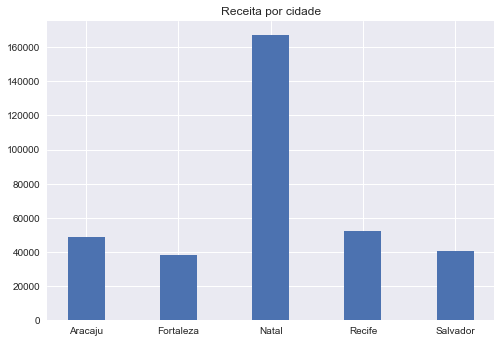

In [53]:
x = receita_cidades['Cidade']
y = receita_cidades['Receita']
plt.title('Receita por cidade')
plt.bar(x, y, align='center', width = 0.4)
plt.show()

**Obtendo a Média de Vendas por Cidades**

In [21]:
media_venda_cidades = df.groupby('Cidade')['Vendas'].mean().reset_index()
media_venda_cidades

,Cidade,Vendas
0,Aracaju,72.869077
1,Fortaleza,71.272606
2,Natal,246.615667
3,Recife,78.303521
4,Salvador,82.143333


**Gerando o Gráfico da média de Vendas por Cidades**

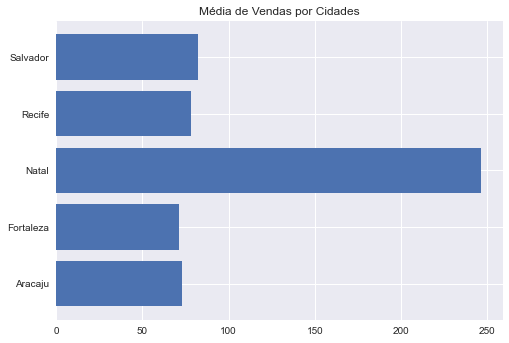

In [52]:
x = media_venda_cidades['Cidade']
y = media_venda_cidades['Vendas']
plt.title('Média de Vendas por Cidades')
plt.barh(x, y, align='center')
plt.show()

In [24]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


**Trabalhando com datas**

In [25]:
#Trasnformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [35]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID       int64
Qtde         int64
Receita    float64
dtype: object

In [26]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [129]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

**Gerando a Receita Anual**

In [33]:
#Agrupamento por ano
receita_ano = df.groupby(df["Data"].dt.year)["Receita"].sum().reset_index()

In [34]:
receita_ano

,Data,Receita
0,2018,118176.53
1,2019,228246.45


**Criando as Colunas Ano, Mês e dia**

In [42]:
df["Ano_Venda"], df["Mês_venda"], df["Dia_venda"] = (df["Data"].dt.year, df["Data"].dt.month, df["Data"].dt.day)

In [43]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_venda,Dia_venda
122,Salvador,2019-03-02,13.27,1037,1,13.27,2019,3,2
49,Aracaju,2018-01-01,53.74,1522,3,161.22,2018,1,1
79,Recife,2019-01-01,14.53,983,6,87.18,2019,1,1
207,Natal,2019-01-02,46.70,1036,2,93.40,2019,1,2
91,Salvador,2019-01-01,17.74,1035,1,17.74,2019,1,1


In [44]:
#Verificando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [45]:
#Calculando e grando a coluna de diferênça de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [46]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_venda,Dia_venda,diferenca_dias
46,Aracaju,2018-01-01,41.42,1522,2,82.84,2018,1,1,0 days
51,Salvador,2019-01-01,13.37,1037,2,26.74,2019,1,1,365 days
128,Natal,2019-01-02,36.84,1034,1,36.84,2019,1,2,366 days
96,Aracaju,2018-01-01,85.92,1521,2,171.84,2018,1,1,0 days
128,Recife,2019-03-02,38.70,982,4,154.80,2019,3,2,425 days


**Analisando o Primeiro Timestre**

In [50]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [46]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
119,Fortaleza,2019-03-02,152.30,982,7,1066.10,2019,3,2,425 days,1
213,Salvador,2019-01-02,42.12,1035,1,42.12,2019,1,2,366 days,1
89,Natal,2019-01-02,17.46,1034,1,17.46,2019,1,2,366 days,1
111,Salvador,2019-03-02,147.35,1037,2,294.70,2019,3,2,425 days,1
103,Recife,2019-01-01,41.65,982,3,124.95,2019,1,1,365 days,1


In [78]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_venda,Dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


**Vendas do Mês de Março por Lojas**

In [79]:
vendas_marco_2019 = vendas_marco_19.groupby("LojaID")['Vendas'].sum().reset_index()
vendas_marco_2019

,LojaID,Vendas
0,852,2223.00
1,853,3478.00
2,854,5662.00
3,980,863.02
4,981,505.18
5,982,1721.10
6,983,1995.02
7,1034,343.64
8,1035,813.23
9,1036,1007.88


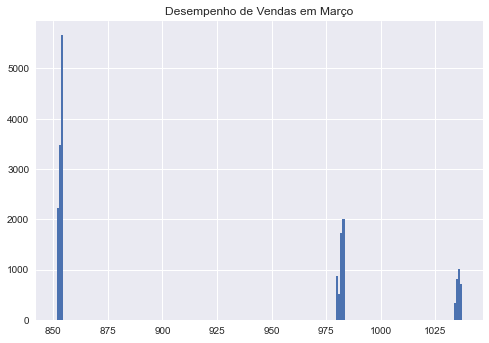

In [82]:
x = vendas_marco_2019["LojaID"]
y = vendas_marco_2019["Vendas"]
plt.title("Desempenho de Vendas em Março")
plt.bar(x, y, align = "center", width = 1)
plt.show()